<a href="https://www.kaggle.com/code/shabareesharyan/decision-tree-on-palmer-penguin?scriptVersionId=105648096" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as srs
import matplotlib.pyplot as plt

In [2]:
pengu = pd.read_csv('../input/palmer-archipelago-antarctica-penguin-data/penguins_size.csv')
pengu.head() #prints first 5 rows of dataset


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
pengu.isnull #check how many values are null

<bound method DataFrame.isnull of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
pengu = pengu.dropna() #drop all the null values

In [6]:
#store all but last col in x and last col in y
#OneHotEncoder().fit_transform(pengu)

X = pengu.iloc[:,:-1]
Y = pengu['sex']

In [7]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['species', 'island'], dtype='object')


In [8]:
le = LabelEncoder()

for i in objList:
    X[i] = le.fit_transform(X[i].astype(str))
#labelencoding all string values to float in X for model
print (X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    int64  
 1   island             334 non-null    int64  
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.3 KB
None


In [9]:
#splitting the data into training and test sets with 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
DT1 = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3 , min_samples_split = 3, random_state = 100)

In [12]:
DT1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=100)

In [13]:
ypred = DT1.predict(X_test)

In [14]:
DT1.score(X_train,Y_train)  #model score

0.9055793991416309

In [15]:
from sklearn.metrics import confusion_matrix , classification_report

In [16]:
#The confusion matrix for predictions vs test cases
print("confusion matrix: \n",confusion_matrix(Y_test,ypred),end="\n")
print("classification report:\n",classification_report(Y_test,ypred))

confusion matrix: 
 [[49  4]
 [ 9 39]]
classification report:
               precision    recall  f1-score   support

      FEMALE       0.84      0.92      0.88        53
        MALE       0.91      0.81      0.86        48

    accuracy                           0.87       101
   macro avg       0.88      0.87      0.87       101
weighted avg       0.87      0.87      0.87       101



In [17]:
from sklearn.tree import plot_tree #to plot the decision tree

In [18]:
l1 =list(X.columns)
l2 = list(set(Y))

Decision Tree View: 



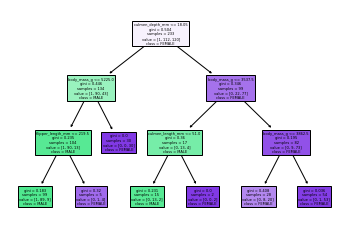

In [19]:
plot_tree(DT1,feature_names = l1,class_names = l2,filled =True)
print("Decision Tree View: \n")
plt.show()